In [2]:
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)

In [3]:
data = pd.read_csv('/Users/anastasia/Downloads/Unicorn+Companies/Unicorn_Companies.csv')

# EDA, Data Cleaning and Data Transforming

In [4]:
data.head(3)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."


In [5]:
data.tail(3)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
1071,Zihaiguo,$1B,2021-05-06,Consumer & retail,Chongqing,China,Asia,2018,$80M,"Xingwang Investment Management, China Capital ..."
1072,Zopa,$1B,2021-10-19,Fintech,London,United Kingdom,Europe,2005,$792M,"IAG Capital Partners, Augmentum Fintech, North..."
1073,Zwift,$1B,2020-09-16,E-commerce & direct-to-consumer,Long Beach,United States,North America,2014,$620M,"Novator Partners, True, Causeway Media Partners"


In [6]:
data.shape

(1074, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country           1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [8]:
data.columns

Index(['Company', 'Valuation', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding', 'Select Investors'],
      dtype='object')

### Data types transformation 

### Funding 

In [9]:
data.Funding

0         $8B
1         $7B
2         $2B
3         $2B
4         $4B
        ...  
1069    $379M
1070    $990M
1071     $80M
1072    $792M
1073    $620M
Name: Funding, Length: 1074, dtype: object

In [10]:
data.Funding.value_counts()

$1B        60
$2B        30
Unknown    12
$200M      12
$4B         9
           ..
$717M       1
$101M       1
$19M        1
$946M       1
$620M       1
Name: Funding, Length: 539, dtype: int64

Let's drop 'Unknown' values from 'Funding' column of the DataFrame. There is not many of them.

In [11]:
data2 = data[data.Funding != 'Unknown'].reset_index(drop = True)
data2.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."


Let's check how many currencies are in the column

In [12]:
data2.Funding.str.split('', expand = True).get(1).value_counts()

$    1062
Name: 1, dtype: int64

In [13]:
num = []
for i in data2.Funding:
   num.append(i[-1:])   

In [14]:
value = []
import re
for i in data2.Funding:
    value.append(str(re.findall(r'\d+', i)).strip('[]').strip("''"))

In [15]:
print( 'num:', len(num))
print( 'value:', len(value))

num: 1062
value: 1062


In [16]:
data_funding = pd.DataFrame({'num': num, 'value': value })
data_funding

,num,value
0,B,8
1,B,7
2,B,2
3,B,2
4,B,4
...,...,...
1057,M,379
1058,M,990
1059,M,80
1060,M,792


In [17]:
data_funding.num.value_counts()

M    948
B    114
Name: num, dtype: int64

In [18]:
data_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   num     1062 non-null   object
 1   value   1062 non-null   object
dtypes: object(2)
memory usage: 16.7+ KB


Let's make all the numbers in Funding in millions

In [19]:
data_funding.value = data_funding.value.astype(int)

In [20]:
data_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   num     1062 non-null   object
 1   value   1062 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.7+ KB


In [21]:
data_funding.value[data_funding.num == 'B'] = data_funding.value.loc[data_funding.num == 'B']*1000

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36195/1626061532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_funding.value[data_funding.num == 'B'] = data_funding.value.loc[data_funding.num == 'B']*1000


In [22]:
data_funding

,num,value
0,B,8000
1,B,7000
2,B,2000
3,B,2000
4,B,4000
...,...,...
1057,M,379
1058,M,990
1059,M,80
1060,M,792


In [23]:
data2.Funding = data_funding['value']

In [24]:
data2.rename(columns = {'Funding':'Funding_M'},inplace = True)

In [25]:
data2.head(2)

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,7000,"Founders Fund, Draper Fisher Jurvetson, Rothen..."


## Valuation

In [26]:
data2.Valuation.value_counts()

$1B      462
$2B      246
$3B      115
$4B       71
$5B       40
$6B       26
$7B       18
$10B      15
$8B       13
$9B       10
$12B      10
$11B       7
$13B       4
$15B       4
$100B      2
$20B       2
$32B       2
$38B       2
$40B       2
$17B       1
$14B       1
$18B       1
$22B       1
$25B       1
$27B       1
$33B       1
$39B       1
$46B       1
$95B       1
$180B      1
Name: Valuation, dtype: int64

In [27]:
data2[data2.Valuation == '$180B']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000,"Sequoia Capital China, SIG Asia Investments, S..."


In [28]:
data2.Valuation.str.split('', expand = True).get(1).value_counts()

$    1062
Name: 1, dtype: int64

In [29]:
num2 = []
for i in data2.Valuation:
   num2.append(i[-1:]) 

value2 = []
import re
for i in data2.Valuation:
    value2.append(str(re.findall(r'\d+', i)).strip('[]').strip("''"))

In [30]:
print( 'num:', len(num2))
print( 'value:', len(value2))

num: 1062
value: 1062


In [31]:
data_valuation = pd.DataFrame({'num': num2, 'value': value2 })
data_valuation

,num,value
0,B,180
1,B,100
2,B,100
3,B,95
4,B,46
...,...,...
1057,B,1
1058,B,1
1059,B,1
1060,B,1


In [32]:
data_valuation.num.value_counts()

B    1062
Name: num, dtype: int64

Let's make them in millions as well

In [33]:
data_valuation.value = data_valuation.value.astype(int)*1000

In [34]:
data_valuation

,num,value
0,B,180000
1,B,100000
2,B,100000
3,B,95000
4,B,46000
...,...,...
1057,B,1000
1058,B,1000
1059,B,1000
1060,B,1000


In [35]:
data2.Valuation = data_valuation.value

In [36]:
data2.rename(columns = {'Valuation':'Valuation_M'}, inplace = True)

In [37]:
data2.head(7).sort_values(by = 'Valuation_M', ascending = False)

,Company,Valuation_M,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
0,Bytedance,180000,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100000,2012-12-01,Other,Hawthorne,United States,North America,2002,7000,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100000,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2000,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95000,2014-01-23,Fintech,San Francisco,United States,North America,2010,2000,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46000,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4000,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,40000,2018-01-08,Internet software & services,Surry Hills,Australia,Oceania,2012,572,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,40000,2019-05-02,Fintech,London,United Kingdom,Europe,2012,2000,"Tiger Global Management, Insight Partners, DST..."


In [38]:
data2.Valuation_M.describe()

count      1062.000000
mean       3478.342750
std        8591.965313
min        1000.000000
25%        1000.000000
50%        2000.000000
75%        3000.000000
max      180000.000000
Name: Valuation_M, dtype: float64

In [39]:
data2[data2.Valuation_M > 3000][['Industry','Country','City','Year Founded']]

,Industry,Country,City,Year Founded
0,Artificial intelligence,China,Beijing,2012
1,Other,United States,Hawthorne,2002
2,E-commerce & direct-to-consumer,China,Shenzhen,2008
3,Fintech,United States,San Francisco,2010
4,Fintech,Sweden,Stockholm,2005
...,...,...,...,...
234,Data management & analytics,United States,Palo Alto,2014
235,E-commerce & direct-to-consumer,United States,Carlsbad,2015
236,Internet software & services,United States,San Francisco,2012
237,Fintech,United States,Miami,2021


In [40]:
valued_com = data2[data2.Valuation_M > 3000][['Industry','Country','City','Year Founded']]

In [41]:
valued_com.Industry.value_counts(normalize = True)

Fintech                                0.230126
Internet software & services           0.200837
E-commerce & direct-to-consumer        0.100418
Health                                 0.079498
Artificial intelligence                0.066946
Data management & analytics            0.041841
Other                                  0.037657
Hardware                               0.037657
Auto & transportation                  0.037657
Cybersecurity                          0.037657
Supply chain, logistics, & delivery    0.033473
Mobile & telecommunications            0.033473
Edtech                                 0.025105
Consumer & retail                      0.020921
Travel                                 0.016736
Name: Industry, dtype: float64

In [42]:
valued_com.Country.value_counts(normalize = True)

United States     0.577406
China             0.133891
India             0.062762
United Kingdom    0.046025
Germany           0.020921
France            0.020921
Canada            0.016736
South Korea       0.016736
Brazil            0.012552
Netherlands       0.008368
Israel            0.008368
Australia         0.008368
Sweden            0.008368
Belgium           0.004184
Lithuania         0.004184
Singapore         0.004184
Austria           0.004184
Denmark           0.004184
Colombia          0.004184
Mexico            0.004184
Finland           0.004184
Hong Kong         0.004184
Estonia           0.004184
Turkey            0.004184
Indonesia         0.004184
Bahamas           0.004184
Ireland           0.004184
Name: Country, dtype: float64

In [43]:
valued_com.City.value_counts(normalize = True)

San Francisco    0.177215
New York         0.080169
Beijing          0.059072
London           0.046414
Bengaluru        0.037975
                   ...   
Oakland          0.004219
Helsinki         0.004219
Zhuhai           0.004219
Vilnius          0.004219
Carlsbad         0.004219
Name: City, Length: 94, dtype: float64

In [44]:
valued_com.describe()

,Year Founded
count,239.000000
mean,2012.033473
std,7.990996
min,1919.000000
25%,2011.000000
50%,2013.000000
75%,2016.000000
max,2021.000000


## Date Joined

In [45]:
data2['Date Joined']

0       2017-04-07
1       2012-12-01
2       2018-07-03
3       2014-01-23
4       2011-12-12
           ...    
1057    2017-06-29
1058    2017-04-18
1059    2021-05-06
1060    2021-10-19
1061    2020-09-16
Name: Date Joined, Length: 1062, dtype: object

In [46]:
data2['Date Joined']= pd.to_datetime(data2['Date Joined'])

In [47]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Company           1062 non-null   object        
 1   Valuation_M       1062 non-null   int64         
 2   Date Joined       1062 non-null   datetime64[ns]
 3   Industry          1062 non-null   object        
 4   City              1046 non-null   object        
 5   Country           1062 non-null   object        
 6   Continent         1062 non-null   object        
 7   Year Founded      1062 non-null   int64         
 8   Funding_M         1062 non-null   int64         
 9   Select Investors  1061 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 83.1+ KB


In [48]:
data2.isna().sum()

Company              0
Valuation_M          0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding_M            0
Select Investors     1
dtype: int64

In [49]:
data2[data2['Select Investors'].isna() == True]

,Company,Valuation_M,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
626,LinkSure Network,1000,2015-01-01,Mobile & telecommunications,Shanghai,China,Asia,2013,52,NaN


In [50]:
data2 = data2.drop([data2.index[626]])

In [51]:
data2.isna().sum()

Company              0
Valuation_M          0
Date Joined          0
Industry             0
City                16
Country              0
Continent            0
Year Founded         0
Funding_M            0
Select Investors     0
dtype: int64

In [52]:
data2[data2.City.isna() == True]

,Company,Valuation_M,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
12,FTX,32000,2021-07-20,Fintech,NaN,Bahamas,North America,2018,2000,"Sequoia Capital, Thoma Bravo, Softbank"
170,HyalRoute,4000,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,263,Kuang-Chi
241,Moglix,3000,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,471,"Jungle Ventures, Accel, Venture Highway"
250,Trax,3000,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,1000,"Hopu Investment Management, Boyu Capital, DC T..."
324,Amber Group,3000,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,328,"Tiger Global Management, Tiger Brokers, DCM Ve..."
381,Ninja Van,2000,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,975,"B Capital Group, Monk's Hill Ventures, Dynamic..."
539,Advance Intelligence Group,2000,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,536,"Vision Plus Capital, GSR Ventures, ZhenFund"
804,Carousell,1000,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,288,"500 Global, Rakuten Ventures, Golden Gate Vent..."
841,Matrixport,1000,2021-06-01,Fintech,NaN,Singapore,Asia,2019,100,"Dragonfly Captial, Qiming Venture Partners, DS..."
872,bolttech,1000,2021-07-01,Fintech,NaN,Singapore,Asia,2018,210,"Mundi Ventures, Doqling Capital Partners, Acti..."


Let's find the most popular city's of the countries with Nan sities

In [53]:
data2[data2.City.isna() == True].Country.unique()

array(['Bahamas', 'Singapore', 'Hong Kong'], dtype=object)

### Bahamas

In [54]:
data2[data2.Country == 'Bahamas']

,Company,Valuation_M,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
12,FTX,32000,2021-07-20,Fintech,NaN,Bahamas,North America,2018,2000,"Sequoia Capital, Thoma Bravo, Softbank"


There is no other companies from Bahamas, so let's take a capital of Bahamas Nassau

In [55]:
data2.City.loc[data2.Country == 'Bahamas'] = 'Nassau'

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36195/1820122735.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.City.loc[data2.Country == 'Bahamas'] = 'Nassau'


In [56]:
data2[data2.Country == 'Bahamas'].City

12    Nassau
Name: City, dtype: object

### Singapore

In [57]:
data2[data2.Country == 'Singapore']

,Company,Valuation_M,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
170,HyalRoute,4000,2020-05-26,Mobile & telecommunications,NaN,Singapore,Asia,2015,263,Kuang-Chi
241,Moglix,3000,2021-05-17,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,471,"Jungle Ventures, Accel, Venture Highway"
250,Trax,3000,2019-07-22,Artificial intelligence,NaN,Singapore,Asia,2010,1000,"Hopu Investment Management, Boyu Capital, DC T..."
381,Ninja Van,2000,2021-09-27,"Supply chain, logistics, & delivery",NaN,Singapore,Asia,2014,975,"B Capital Group, Monk's Hill Ventures, Dynamic..."
539,Advance Intelligence Group,2000,2021-09-23,Artificial intelligence,NaN,Singapore,Asia,2016,536,"Vision Plus Capital, GSR Ventures, ZhenFund"
804,Carousell,1000,2021-09-15,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2012,288,"500 Global, Rakuten Ventures, Golden Gate Vent..."
841,Matrixport,1000,2021-06-01,Fintech,NaN,Singapore,Asia,2019,100,"Dragonfly Captial, Qiming Venture Partners, DS..."
872,bolttech,1000,2021-07-01,Fintech,NaN,Singapore,Asia,2018,210,"Mundi Ventures, Doqling Capital Partners, Acti..."
881,Carro,1000,2021-06-14,E-commerce & direct-to-consumer,NaN,Singapore,Asia,2015,595,"SingTel Innov8, Alpha JWC Ventures, Golden Gat..."
969,NIUM,1000,2021-07-13,Fintech,NaN,Singapore,Asia,2014,285,"Vertex Ventures SE Asia, Global Founders Capit..."


There is also no city for Singapore. Let's do the same as we did before and take a capital of Singapore Singapore

In [58]:
data2.City.loc[data2.Country == 'Singapore'] = 'Singapore'

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36195/3508096289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.City.loc[data2.Country == 'Singapore'] = 'Singapore'


In [59]:
data2.City.loc[data2.Country == 'Singapore']

170    Singapore
241    Singapore
250    Singapore
381    Singapore
539    Singapore
804    Singapore
841    Singapore
872    Singapore
881    Singapore
969    Singapore
975    Singapore
983    Singapore
Name: City, dtype: object

### Hong Kong

In [60]:
data2[data2.Country == 'Hong Kong']

,Company,Valuation_M,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
56,Lalamove,10000,2019-02-21,"Supply chain, logistics, & delivery",Cheung Sha Wan,Hong Kong,Asia,2013,2000,"MindWorks Ventures, Shunwei Capital Partners, ..."
324,Amber Group,3000,2021-06-21,Fintech,NaN,Hong Kong,Asia,2015,328,"Tiger Global Management, Tiger Brokers, DCM Ve..."
592,Trendy Group International,2000,2012-02-13,Consumer & retail,Kowloon,Hong Kong,Asia,1999,200,L Capital Partners
714,Klook,1000,2018-08-07,Travel,Central,Hong Kong,Asia,2014,722,"Sequoia Capital China, Goldman Sachs, Matrix P..."
884,Cider,1000,2021-09-02,E-commerce & direct-to-consumer,NaN,Hong Kong,Asia,2020,140,"Andreessen Horowitz, DST Global, IDG Capital"
1049,WeLab,1000,2017-11-08,Fintech,NaN,Hong Kong,Asia,2013,871,"Sequoia Capital China, ING, Alibaba Entreprene..."


There is no capital of Hong Kong, overall city can be called Hong Kong

In [61]:
data2.City.loc[data2.Country == 'Hong Kong'] = 'Hong Kong'

/var/folders/8z/g1v85qt55t999sxjpnmjb4tr0000gn/T/ipykernel_36195/640783588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.City.loc[data2.Country == 'Hong Kong'] = 'Hong Kong'


In [62]:
data2.City.loc[data2.Country == 'Hong Kong']

56      Hong Kong
324     Hong Kong
592     Hong Kong
714     Hong Kong
884     Hong Kong
1049    Hong Kong
Name: City, dtype: object

In [63]:
data2.isna().sum()

Company             0
Valuation_M         0
Date Joined         0
Industry            0
City                0
Country             0
Continent           0
Year Founded        0
Funding_M           0
Select Investors    0
dtype: int64

In [64]:
data2.duplicated().sum()

0

In [65]:
data[data.Company.duplicated()]

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
44,Bolt,$11B,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic"


In [66]:
data[data.Company == 'Bolt']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
40,Bolt,$11B,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,$1B,"Didi Chuxing, Diamler, TMT Investments"
44,Bolt,$11B,2021-10-08,Fintech,San Francisco,United States,North America,2014,$1B,"Activant Capital, Tribe Capital, General Atlantic"


Bolt company mentioned 2 times in different industries, we will treat them as different companies

In [67]:
data2.head()

,Company,Valuation_M,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
0,Bytedance,180000,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8000,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100000,2012-12-01,Other,Hawthorne,United States,North America,2002,7000,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100000,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2000,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95000,2014-01-23,Fintech,San Francisco,United States,North America,2010,2000,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46000,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4000,"Institutional Venture Partners, Sequoia Capita..."


In [68]:
data2.describe()

,Valuation_M,Year Founded,Funding_M
count,1061.000000,1061.000000,1061.000000
mean,3480.678605,2012.917059,557.745523
std,8595.679801,5.679216,810.366898
min,1000.000000,1919.000000,0.000000
25%,1000.000000,2011.000000,223.000000
50%,2000.000000,2014.000000,370.000000
75%,3000.000000,2016.000000,610.000000
max,180000.000000,2021.000000,14000.000000


### 43% of companies had validation in the amount of 1000 millions or 1 billion dollars

In [69]:
data2.Valuation_M.value_counts(normalize = True)

1000      0.434496
2000      0.231857
3000      0.108388
4000      0.066918
5000      0.037700
6000      0.024505
7000      0.016965
10000     0.014138
8000      0.012253
9000      0.009425
12000     0.009425
11000     0.006598
13000     0.003770
15000     0.003770
100000    0.001885
20000     0.001885
32000     0.001885
38000     0.001885
40000     0.001885
17000     0.000943
14000     0.000943
18000     0.000943
22000     0.000943
25000     0.000943
27000     0.000943
33000     0.000943
39000     0.000943
46000     0.000943
95000     0.000943
180000    0.000943
Name: Valuation_M, dtype: float64

In [70]:
data2.Funding_M.value_counts()

1000    60
2000    30
200     12
4000     9
3000     7
        ..
101      1
19       1
946      1
180      1
620      1
Name: Funding_M, Length: 537, dtype: int64

In [71]:
df_year = pd.DataFrame(data2['Year Founded'].value_counts())

### 2015 is the year when the majority of companies from the dataset were founded

<AxesSubplot:xlabel='year'>

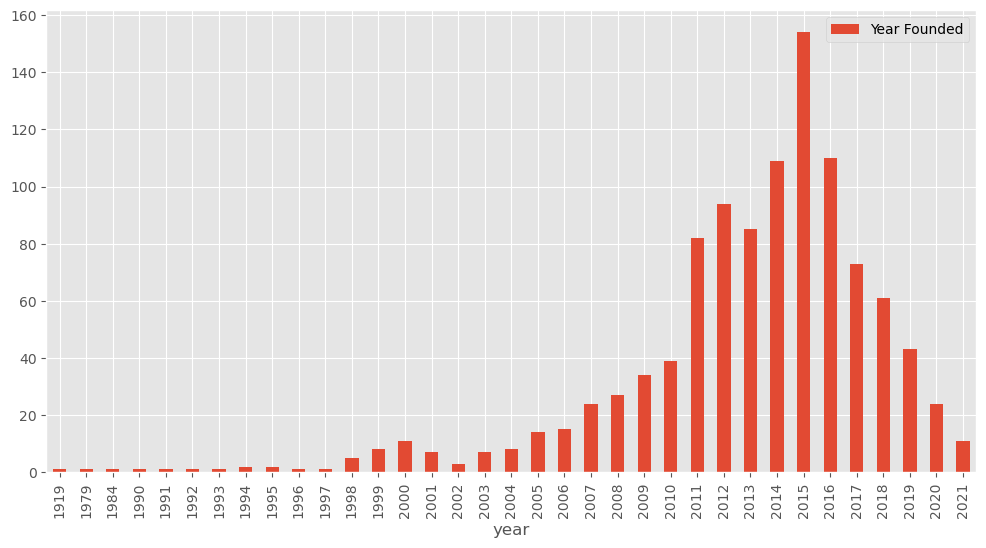

In [72]:
df_year.index.name ='year'
df_year.rename(columns ={'Year Founded':'value_counts'})
df_year.sort_values(by ='year').plot(kind = 'bar')

In [73]:
data2[data2['Year Founded'] == 1919]

,Company,Valuation_M,Date Joined,Industry,City,Country,Continent,Year Founded,Funding_M,Select Investors
189,Otto Bock HealthCare,4000,2017-06-24,Health,Duderstadt,Germany,Europe,1919,0,EQT Partners


### Fintech and Internet software & services are the most popular industries

In [74]:
data2.Industry.value_counts(normalize = True)

Fintech                                0.209237
Internet software & services           0.191329
E-commerce & direct-to-consumer        0.102733
Health                                 0.069746
Artificial intelligence                0.068803
Other                                  0.052780
Supply chain, logistics, & delivery    0.052780
Cybersecurity                          0.047125
Data management & analytics            0.037700
Mobile & telecommunications            0.033930
Hardware                               0.032045
Auto & transportation                  0.029218
Edtech                                 0.026390
Consumer & retail                      0.022620
Travel                                 0.013195
Artificial Intelligence                0.010368
Name: Industry, dtype: float64

<AxesSubplot:>

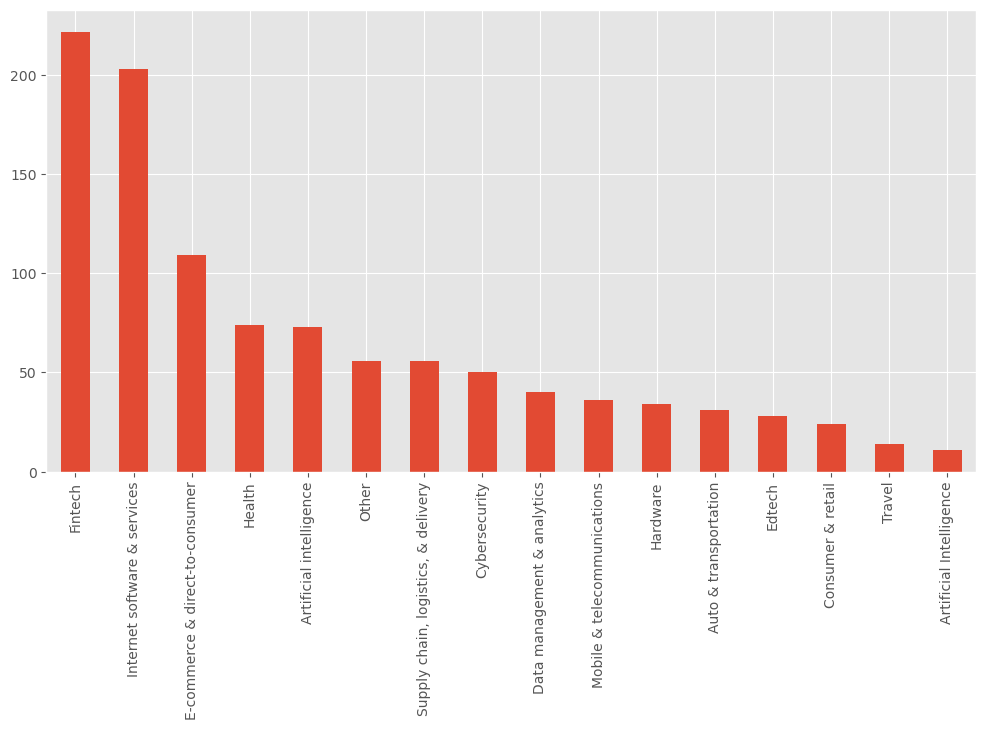

In [75]:
data2.Industry.value_counts().plot(kind = 'bar')

### More than 50% of companies are from North America, almost 30% from Asia

In [76]:
data2.Continent.value_counts(normalize = True)

North America    0.547597
Asia             0.288407
Europe           0.133836
South America    0.019793
Oceania          0.007540
Africa           0.002828
Name: Continent, dtype: float64

<AxesSubplot:>

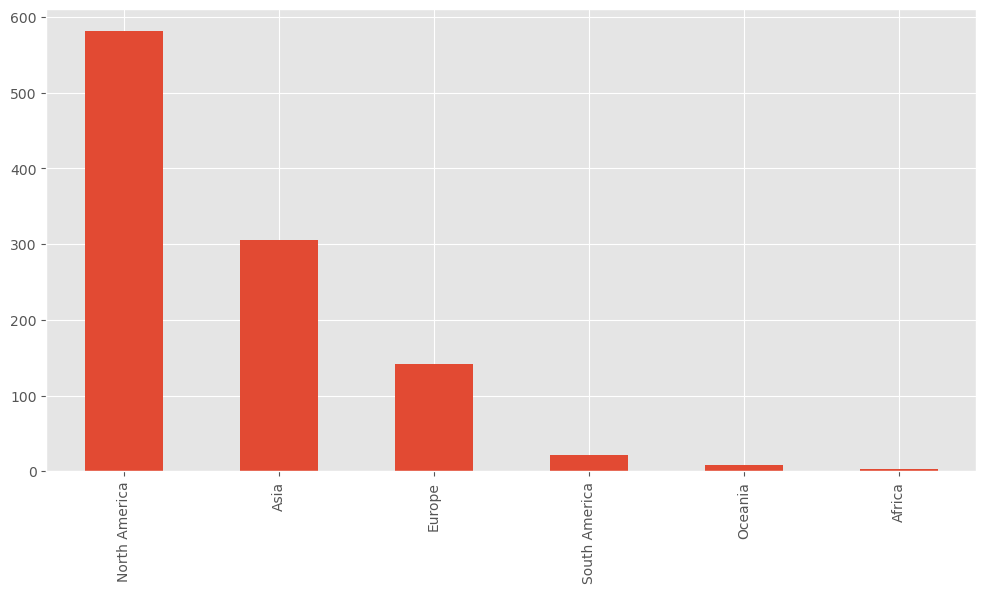

In [77]:
data2.Continent.value_counts().plot(kind = 'bar')

### More than 50% of companies are from United States, more than 15% from China

In [78]:
data2.Country.value_counts(normalize = True)

United States           0.523091
China                   0.159284
India                   0.061263
United Kingdom          0.040528
Germany                 0.024505
France                  0.021678
Israel                  0.018850
Canada                  0.016965
Brazil                  0.015080
Singapore               0.011310
South Korea             0.011310
Australia               0.007540
Hong Kong               0.005655
Mexico                  0.005655
Indonesia               0.005655
Netherlands             0.005655
Sweden                  0.005655
Switzerland             0.004713
Japan                   0.004713
Ireland                 0.004713
Finland                 0.003770
Norway                  0.003770
United Arab Emirates    0.002828
Turkey                  0.002828
Spain                   0.002828
Belgium                 0.002828
Chile                   0.001885
South Africa            0.001885
Philippines             0.001885
Thailand                0.001885
Estonia   

<AxesSubplot:>

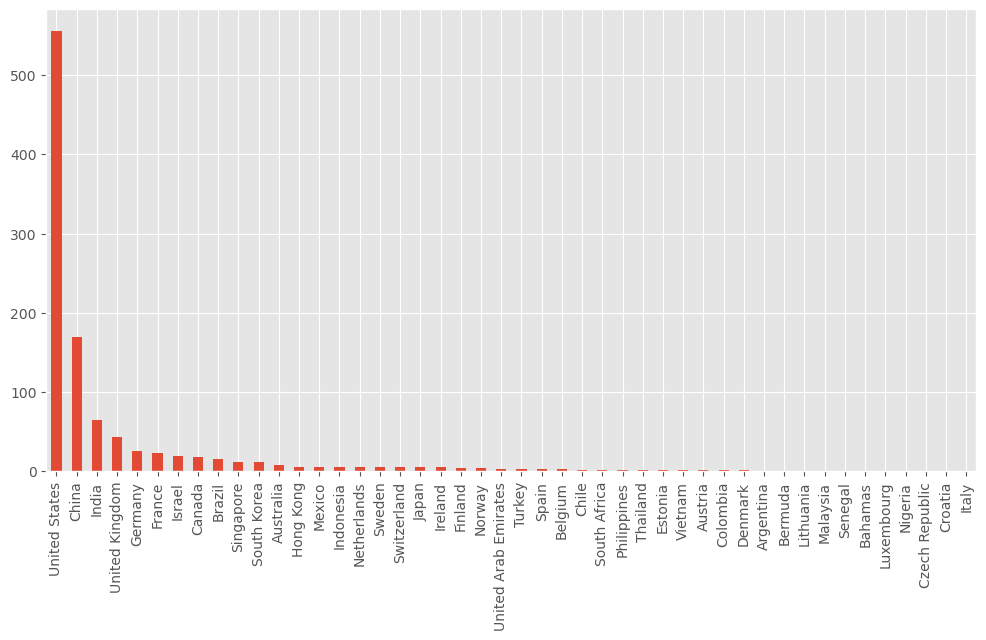

In [79]:
data2.Country.value_counts().plot(kind = 'bar')

### 14% of companies are from San Francisco, which is explainable, because Silicon Valley is in San Francisco

In [80]:
data2.City.value_counts(normalize = True)

San Francisco    0.143261
New York         0.096136
Beijing          0.058435
Shanghai         0.039585
London           0.032045
                   ...   
Nashville        0.000943
Lysaker          0.000943
Richmond         0.000943
Santa Barbara    0.000943
Milpitas         0.000943
Name: City, Length: 253, dtype: float64

<AxesSubplot:>

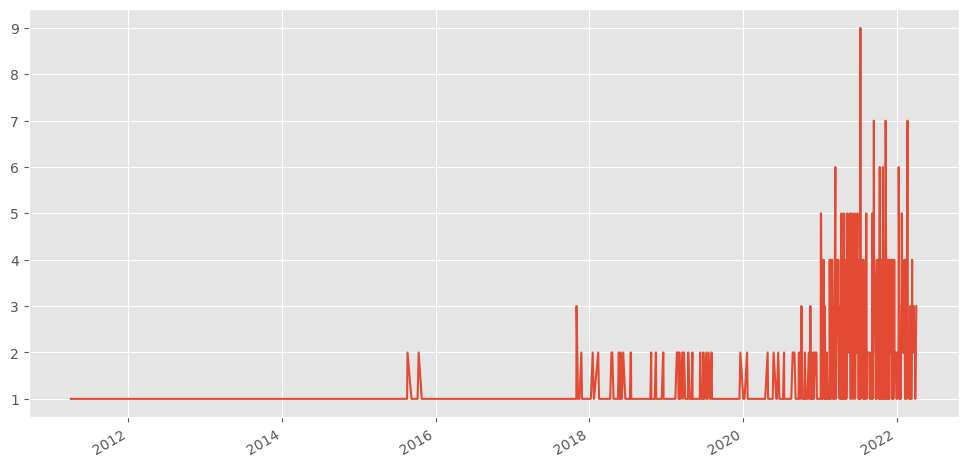

In [81]:
data2['Date Joined'].value_counts().plot(kind = 'line')

In [82]:
a = []
for i in data2['Date Joined']:
    a.append(i.year)

data2['Year_Joined'] = a

### Almost 50% of companies reached 1 billion dollars in valuation in 2021

In [83]:
data2['Year_Joined'].value_counts(normalize = True)

2021    0.483506
2022    0.109331
2020    0.100848
2018    0.097078
2019    0.096136
2017    0.041470
2015    0.032045
2016    0.018850
2014    0.012253
2012    0.003770
2013    0.002828
2011    0.001885
Name: Year_Joined, dtype: float64

<AxesSubplot:>

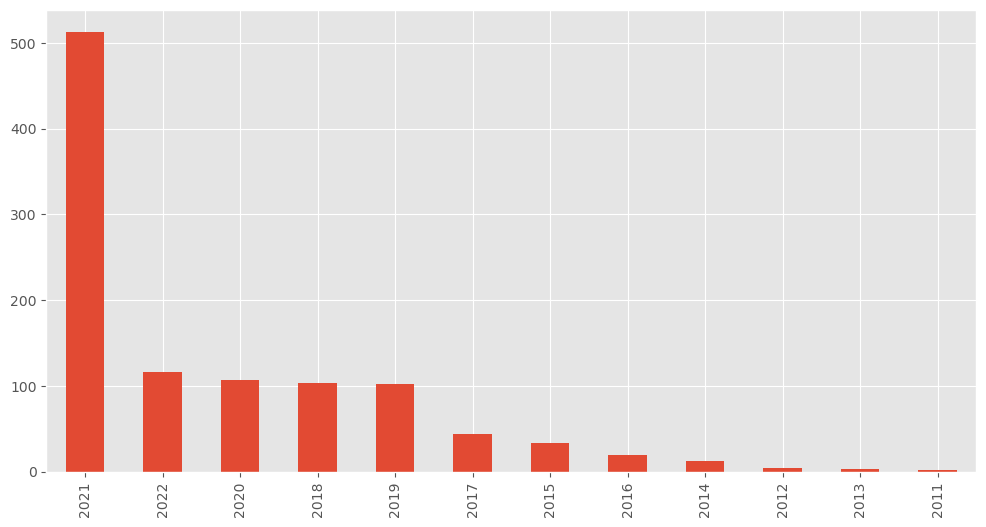

In [84]:
data2['Year_Joined'].value_counts().plot(kind = 'bar')

In [85]:
b = []
for i in data2['Select Investors']:
    b.append(i.split(','))


In [86]:
list_of_investors = []
for i in b:
    list_of_investors+=i

### Top 5 investors:
#### Tiger Global Management           
#### Accel                            
#### Sequoia Capital                   
#### Sequoia Capital China            
#### Andreessen Horowitz 

In [87]:
pd.DataFrame(list_of_investors).value_counts()

 Tiger Global Management           39
 Accel                             32
 Sequoia Capital                   30
Sequoia Capital China              30
Andreessen Horowitz                29
                                   ..
 SingTel Innov8                     1
 SingulariTeam                      1
 Sino-Ocean Capital                 1
 Sinovation Ventures                1
 China Capital Investment Group     1
Length: 1517, dtype: int64

## Correlations

In [88]:
data2.columns

Index(['Company', 'Valuation_M', 'Date Joined', 'Industry', 'City', 'Country',
       'Continent', 'Year Founded', 'Funding_M', 'Select Investors',
       'Year_Joined'],
      dtype='object')

In [89]:
correlation_matrix = data2[['Valuation_M', 'Funding_M']].corr()

In [90]:
correlation_matrix

,Valuation_M,Funding_M
Valuation_M,1.000000,0.598348
Funding_M,0.598348,1.000000


In [91]:
import pandas as pd

# Словари для хранения кодировок
encoding_maps = {}

# Кодирование колонок 'Industry', 'City', 'Country', 'Continent'
columns_to_encode = ['Industry', 'City', 'Country', 'Continent']

for column in columns_to_encode:
    # Создаем словарь с частотой встречаемости каждой категории
    encoding_map = data2[column].value_counts().to_dict()
    
    # Заменяем значения в колонке на их частоту встречаемости
    data2[column] = data2[column].map(encoding_map)
    
    # Сохраняем словарь кодировок
    encoding_maps[column] = encoding_map

# Теперь переменные 'Industry', 'City', 'Country', 'Continent' закодированы с использованием частоты встречаемости

# Можно сохранить словари кодировок, если они понадобятся в будущем
for column, encoding_map in encoding_maps.items():
    pd.Series(encoding_map).to_csv(f'{column}_encoding_map.csv')

# Сохраняем обновленный датасет
data2.to_csv('encoded_data2.csv', index=False)


<AxesSubplot:>

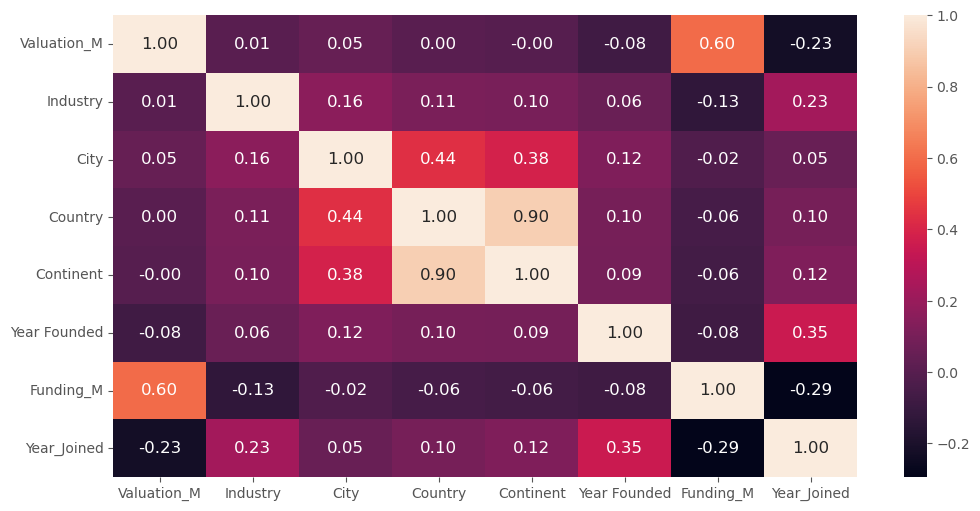

In [93]:
sns.heatmap(data2.corr(),annot=True,annot_kws={"size":12},fmt=".2f")

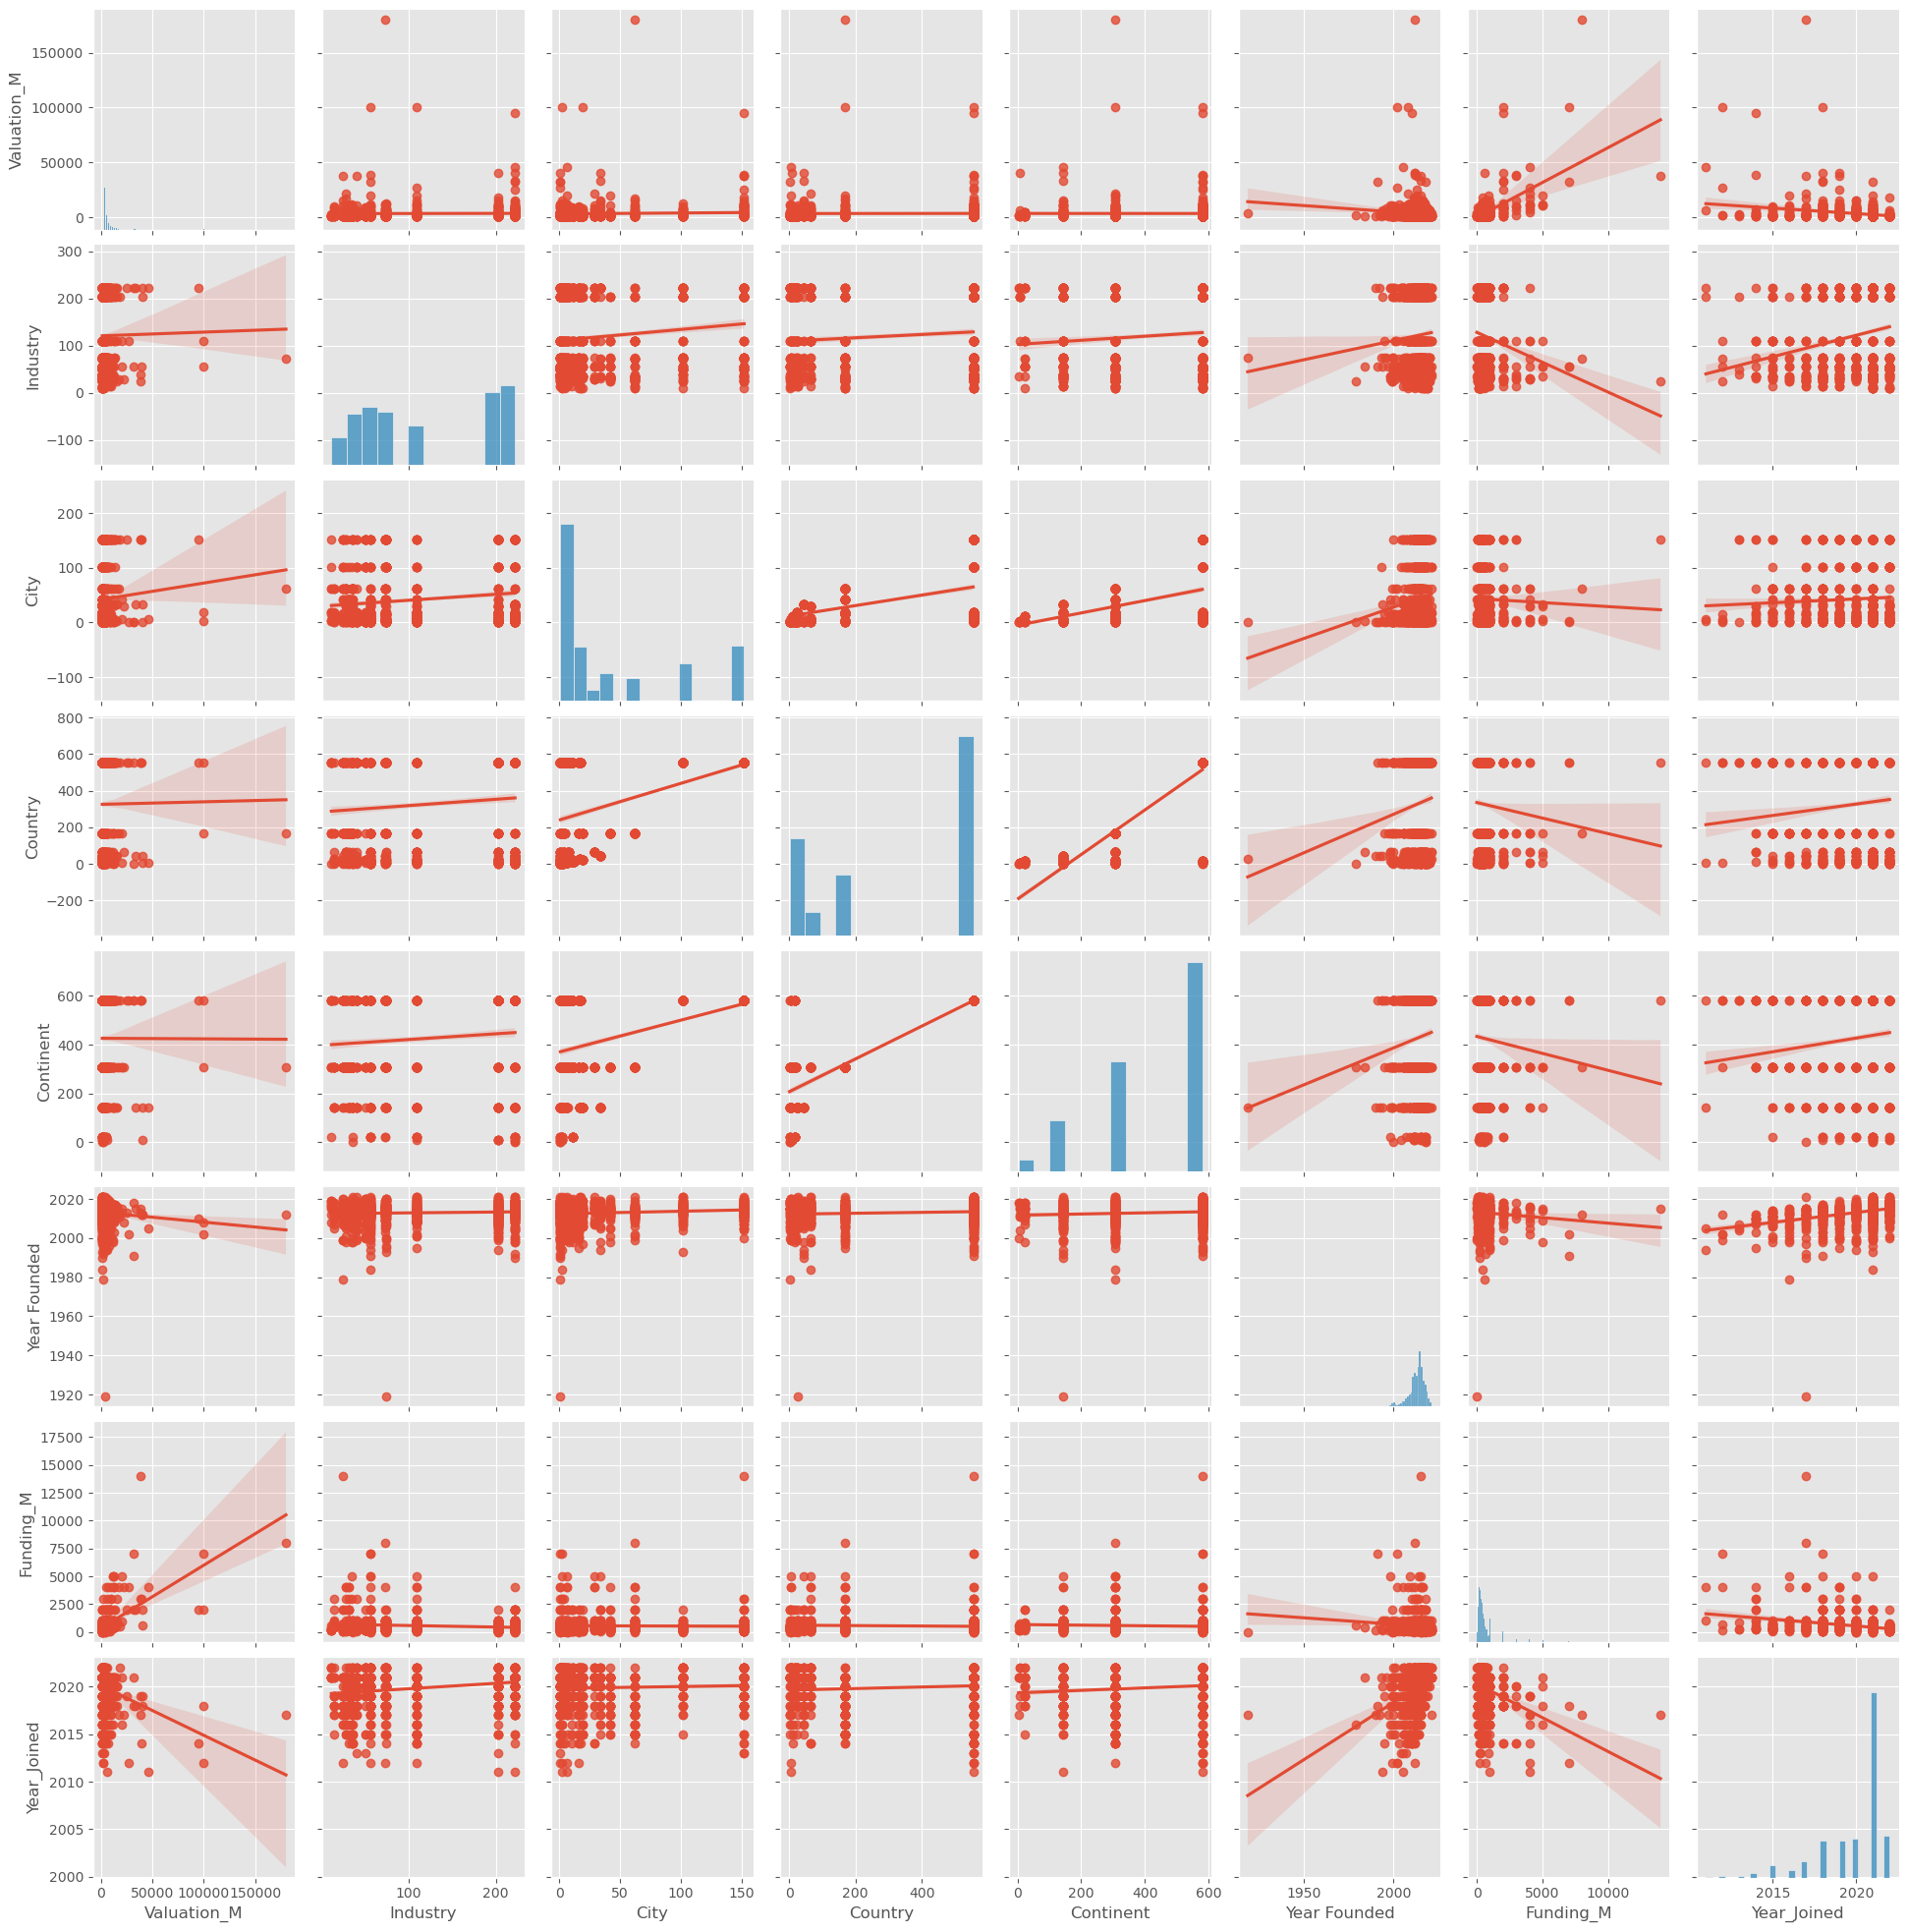

In [94]:
sns.pairplot(data2, kind = 'reg')

#### There is some positive correlation between funding and valuation, the coefficient is 0.59